## Imports

In [9]:
import pandas
import numpy
import seaborn
import matplotlib
import matplotlib.pyplot as pyplot
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [2]:
dataframe = pandas.read_csv(r"C:\Users\justi\Downloads\Final Project\2. Data\Prepared\air_quality_prepared.csv")

## Data Prep

In [3]:
# Create subset for use with time series analysis
phoenix = dataframe.loc[dataframe['City'] == 'Phoenix']
subset = phoenix[['Date', 'O3 AQI']]

In [4]:
# Create a datetime index and drop Date column
from datetime import datetime

subset['datetime'] = pandas.to_datetime(subset['Date'])
subset = subset.set_index('datetime')
subset.drop(columns = 'Date', inplace=True)

In [5]:
subset.head()

,O3 AQI
datetime,
2000-01-01,37
2000-01-02,30
2000-01-03,15
2000-01-04,31
2000-01-05,11


Text(0, 0.5, 'O3 AQI')

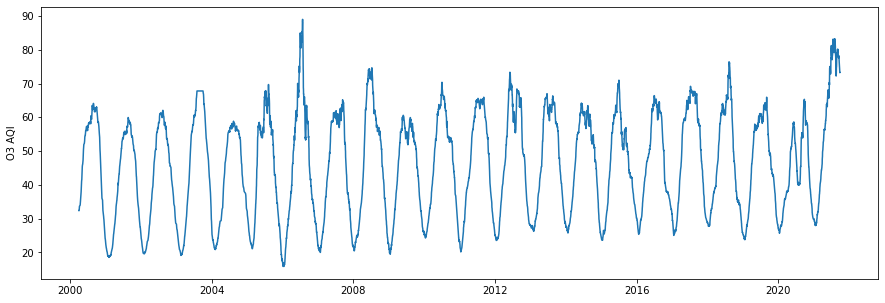

In [23]:
# Plot time series with a moving average of 90 values
pyplot.figure(figsize=(15,5))
pyplot.plot(subset.rolling(90).mean())
pyplot.ylabel('O3 AQI')

## Decomposition

In [47]:
# Decompose the components of the time series
decomposition = sm.tsa.seasonal_decompose(subset, period=90, model='additive')

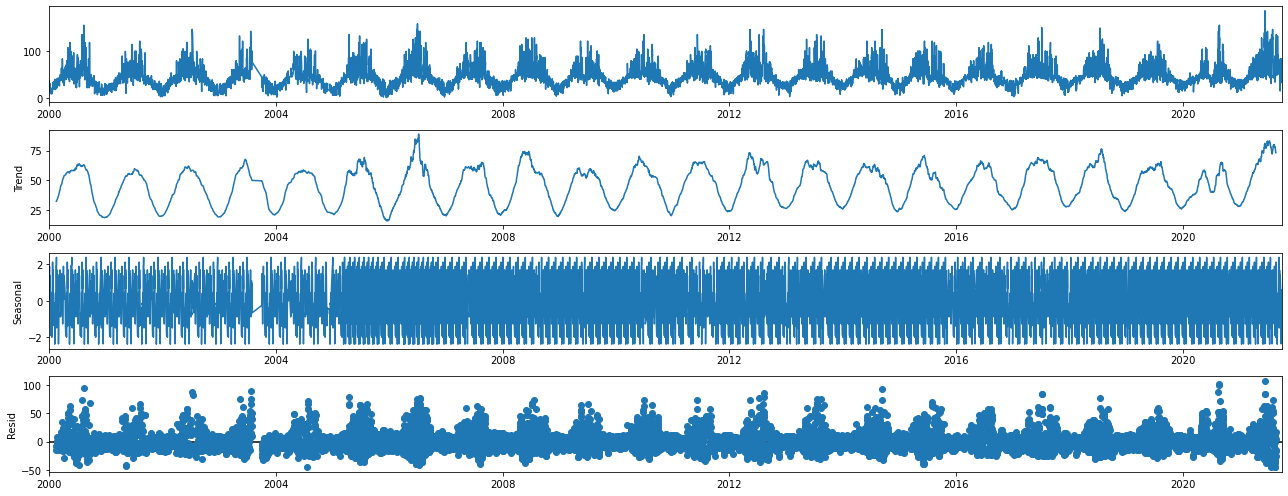

In [48]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7
decomposition.plot()
pyplot.show()

The first chart is the level, which contains all components of the time series.
Overall, the trend doesn't appear to be going up or down.
The seasonality dips up and down multiple times every year.
The time series has noise that follows a repeating pattern.

## Stationarity

In [49]:
# Check time series for stationarity
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    test = adfuller(timeseries, autolag='AIC')
    result = pandas.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(subset['O3 AQI'])

Test Statistic                -6.876740e+00
p-value                        1.468031e-09
Number of Lags Used            4.000000e+01
Number of Observations Used    1.316300e+04
Critical Value (1%)           -3.430847e+00
Critical Value (5%)           -2.861760e+00
Critical Value (10%)          -2.566887e+00
dtype: float64


In [50]:
# Conduct differencing to stationarize time series
data_diff = subset - subset.shift(1)
data_diff.dropna(inplace = True)

In [51]:
dickey_fuller(data_diff['O3 AQI'])

Test Statistic                   -26.234286
p-value                            0.000000
Number of Lags Used               39.000000
Number of Observations Used    13163.000000
Critical Value (1%)               -3.430847
Critical Value (5%)               -2.861760
Critical Value (10%)              -2.566887
dtype: float64


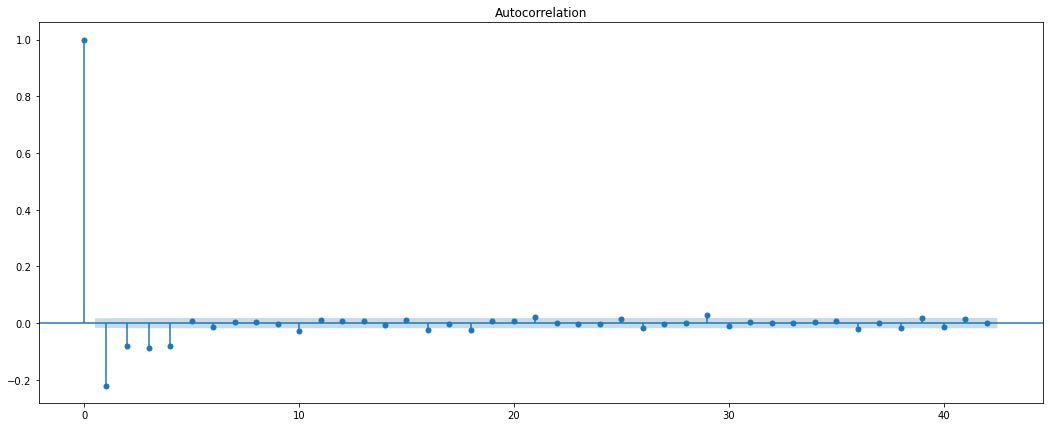

In [60]:
# Check for autocorrelations
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data_diff)
pyplot.show()